# Preparacion de datos

In [1]:
import pandas as pd

# Cargar los archivos CSV en DataFrames
df_parkinson = pd.read_csv("Parkinson.csv")  # Casos de Parkinson
df_contaminacion = pd.read_csv("Contaminacion_aire.csv")  # Tasa de contaminación
df_plomo = pd.read_csv("Plomo.csv")  # Tasa de carga de enfermedad por exposición al plomo
df_pesticidas = pd.read_csv("Pepticidas.csv")  # Uso de pesticidas en toneladas
df_precipitaciones = pd.read_csv("Precipitaciones.csv")  # Precipitaciones en mm
df_calidad_agua = pd.read_csv("Calidad_agua.csv")


In [2]:
display(df_parkinson)

,Año,País,Parkinson
0,1990,Cambodia,21.533830
1,1991,Cambodia,21.483840
2,1992,Cambodia,21.502138
3,1993,Cambodia,21.607151
4,1994,Cambodia,21.767658
...,...,...,...
7291,2017,South America,101.905710
7292,2018,South America,105.467110
7293,2019,South America,108.644905
7294,2020,South America,110.542580


In [5]:
# Unir todos los DataFrames por 'Año' y 'País'
df = df_parkinson.merge(df_contaminacion, on=['Año', 'País'], how='left')
df = df.merge(df_plomo, on=['Año', 'País'], how='left')
df = df.merge(df_calidad_agua, on=["Año","País"], how='left')
df = df.merge(df_pesticidas, on=['Año', 'País'], how='left')
df_final = df.merge(df_precipitaciones, on=['Año', 'País'], how='left')

# Mostrar los primeros datos
display(df_final)

,Año,País,Parkinson,Tasa_contaminacion_Aire,Exp_Plomo,Muertes,Pesticidas,Precipitación (mm)
0,1990,Cambodia,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,1991,Cambodia,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,1992,Cambodia,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,1993,Cambodia,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,1994,Cambodia,21.767658,0.902714,812.10320,5176.5522,2196.54,977.33185
...,...,...,...,...,...,...,...,...
7291,2017,South America,101.905710,NaN,NaN,5844.3230,NaN,NaN
7292,2018,South America,105.467110,NaN,NaN,5681.7460,NaN,NaN
7293,2019,South America,108.644905,NaN,NaN,5672.4670,NaN,NaN
7294,2020,South America,110.542580,NaN,NaN,5413.5270,NaN,NaN


In [7]:
# Calcular el porcentaje de valores NaN en cada columna
nan_percentage = df_final.isnull().mean() * 100

# Mostrar el porcentaje de valores NaN por columna
print(nan_percentage)


Año                         0.000000
País                        0.000000
Parkinson                   0.000000
Tasa_contaminacion_Aire     2.631579
Exp_Plomo                   2.631579
Muertes                     0.000000
Pesticidas                 18.078399
Precipitación (mm)         19.736842
dtype: float64


**ELIMINCACIÓN DE NULOS**

In [6]:
df_final_no_nulos  = df_final.dropna()
display(df_final_no_nulos)

,Año,País,Parkinson,Tasa_contaminacion_Aire,Exp_Plomo,Muertes,Pesticidas,Precipitación (mm)
0,1990,Cambodia,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,1991,Cambodia,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,1992,Cambodia,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,1993,Cambodia,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,1994,Cambodia,21.767658,0.902714,812.10320,5176.5522,2196.54,977.33185
...,...,...,...,...,...,...,...,...
6779,2017,Sudan,33.183840,2.207330,1261.99870,2538.9585,18849.00,1076.95200
6780,2018,Sudan,33.985485,2.483574,1248.51800,1889.6714,18849.00,221.57901
6781,2019,Sudan,34.539875,2.573782,1235.76650,1719.6345,20448.00,878.00850
6782,2020,Sudan,33.731514,2.687866,1224.61080,1554.0481,24062.00,1252.68140


**TABLA FINAL PARA EL MODELO**

In [27]:
df_final_no_nulos = df_final_no_nulos.drop(columns=['Año', 'País'])
display(df_final_no_nulos)

,Parkinson,Tasa_contaminacion_Aire,Exp_Plomo,Muertes,Pesticidas,Precipitación (mm)
0,21.533830,0.770228,799.84644,5680.9985,258.02,1951.19900
1,21.483840,0.867021,798.64690,5618.9200,653.00,904.05820
2,21.502138,0.876114,799.89874,5418.9050,545.00,1474.90120
3,21.607151,0.992484,804.59204,5273.5493,687.00,640.35815
4,21.767658,0.902714,812.10320,5176.5522,2196.54,977.33185
...,...,...,...,...,...,...
6779,33.183840,2.207330,1261.99870,2538.9585,18849.00,1076.95200
6780,33.985485,2.483574,1248.51800,1889.6714,18849.00,221.57901
6781,34.539875,2.573782,1235.76650,1719.6345,20448.00,878.00850
6782,33.731514,2.687866,1224.61080,1554.0481,24062.00,1252.68140


In [28]:
df_final_no_nulos.to_csv('Tabla_modelos.csv', index=False)

**MODELO DE REGRESIÓN DE POISSON**

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Cargar el DataFrame
df = pd.read_csv("Tabla_modelos.csv")

# Definir las variables independientes (X) y dependiente (y)
X = df[['Tasa_contaminacion_Aire', 'Exp_Plomo', 'Muertes', 'Pesticidas', 'Precipitación (mm)']]
y = df['Parkinson']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Añadir constante a las variables independientes para el modelo
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar el modelo de regresión de Poisson
modelo = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Mostrar los resultados del modelo
print(modelo.summary())

# Hacer predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calcular el RMSE (Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Error Cuadrático Medio (RMSE): {rmse}')

# Calcular el MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred)
print(f'Error Absoluto Medio (MAE): {mae}')


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Parkinson   No. Observations:                 4346
Model:                            GLM   Df Residuals:                     4340
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68675.
Date:                Sat, 22 Mar 2025   Deviance:                   1.1192e+05
Time:                        11:49:32   Pearson chi2:                 1.60e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Users\Lorena\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Menos sensibilidad a outliers

La mediana no se ve afectada por valores extremadamente altos o bajos, a diferencia de la media.
Esto es importante porque en datos ambientales (como contaminación, precipitaciones o exposición a toxinas) suele haber valores atípicos.
Mantiene la distribución de los datos

En regresión de Poisson, los datos deben ajustarse a una distribución de conteos o tasas.
La mediana preserva mejor la estructura de los datos originales que la media.
Funciona bien con datos sesgados

Si la variable tiene una distribución asimétrica (como la contaminación o la exposición a plomo), la mediana es más representativa.
Evita distorsionar la relación entre variables

Si usas la media, podrías sesgar los valores hacia los extremos, afectando la precisión del modelo.
La mediana mantiene la relación entre las variables más estable.

C:\Users\Lorena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


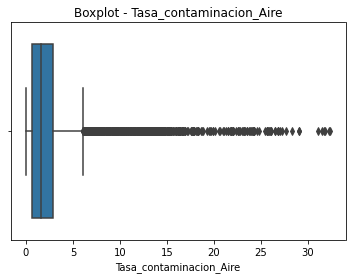

C:\Users\Lorena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


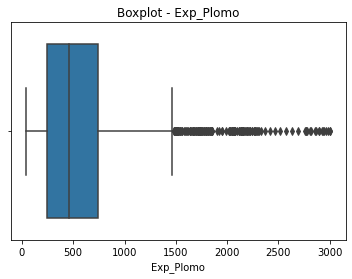

C:\Users\Lorena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


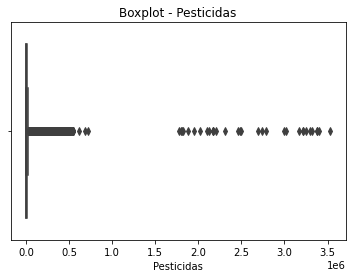

C:\Users\Lorena\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


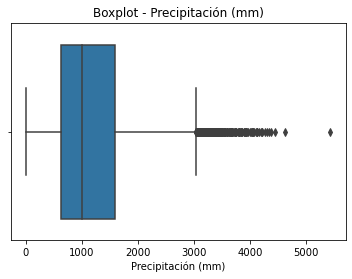

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para Tasa_contaminacion_Aire
sns.boxplot(df['Tasa_contaminacion_Aire'])
plt.title('Boxplot - Tasa_contaminacion_Aire')
plt.show()

# Boxplot para Exp_Plomo
sns.boxplot(df['Exp_Plomo'])
plt.title('Boxplot - Exp_Plomo')
plt.show()

# Boxplot para Pesticidas
sns.boxplot(df['Pesticidas'])
plt.title('Boxplot - Pesticidas')
plt.show()

# Boxplot para Precipitación (mm)
sns.boxplot(df['Precipitación (mm)'])
plt.title('Boxplot - Precipitación (mm)')
plt.show()
